# 数据处理

In [2]:
import pandas as pd #导入Pandas
import numpy as np #导入NumPy
df_fission = pd.read_csv('易速鲜花裂变转化.csv') #载入数据
df_fission.head() #显示数据

,用户码,性别,年龄,城市,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,裂变方案,是否转化
0,1,女,40,杭州,9,2,1,516,6360.66,0.0000,疯狂打折,0
1,2,男,69,杭州,6,2,1,682,28605.00,0.0000,疯狂打折,0
2,3,女,32,杭州,9,1,1,803,10378.09,236311.0932,买一送一,1
3,4,女,37,苏州,0,2,1,778,25564.01,129909.8079,买一送一,1
4,5,男,55,苏州,4,3,0,547,3235.61,136976.1948,买一送一,1


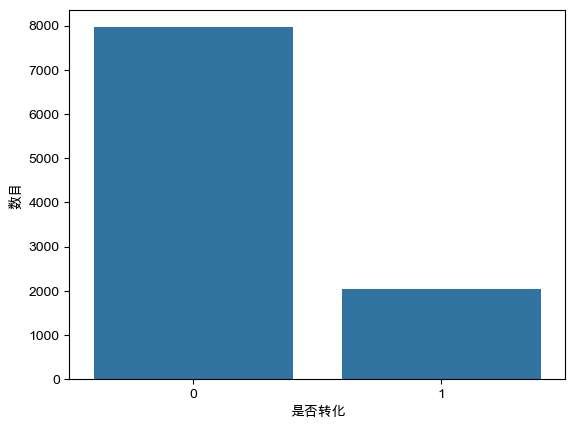

In [5]:
import matplotlib.pyplot as plt #导入pyplot模块
import seaborn as sns #导入Seaborn
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Heiti TC']  # macOS 中文字体
fig = sns.countplot(x='是否转化', data=df_fission) #创建柱状计数图
fig.set_ylabel("数目") #Y轴标题
plt.show() #显示图像

In [6]:
# 把二元类别文本数字化
df_fission['性别'].replace("女",0,inplace = True)
df_fission['性别'].replace("男",1,inplace=True)
# 显示数字类别
print("Gender unique values",df_fission['性别'].unique())
# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
df_fission = pd.get_dummies(df_fission, drop_first = True)
df_fission # 显示数据集

Gender unique values [0 1]


/var/folders/6h/jgmm84rs59q33w5k9xh0t60c0000gp/T/ipykernel_81979/3246272518.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fission['性别'].replace("女",0,inplace = True)
/var/folders/6h/jgmm84rs59q33w5k9xh0t60c0000gp/T/ipykernel_81979/3246272518.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,用户码,性别,年龄,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,是否转化,城市_杭州,城市_苏州,裂变方案_疯狂打折
0,1,0,40,9,2,1,516,6360.66,0.0000,0,True,False,True
1,2,1,69,6,2,1,682,28605.00,0.0000,0,True,False,True
2,3,0,32,9,1,1,803,10378.09,236311.0932,1,True,False,False
3,4,0,37,0,2,1,778,25564.01,129909.8079,1,False,True,False
4,5,1,55,4,3,0,547,3235.61,136976.1948,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,49,7,2,1,746,1930.44,0.0000,0,False,False,True
9996,9997,1,36,1,1,0,569,29593.82,82517.8587,0,True,False,False
9997,9998,0,55,7,1,0,850,32841.84,0.0000,1,False,False,True
9998,9999,1,35,5,1,1,529,21564.34,117800.7531,0,False,False,False


In [7]:
X = df_fission.drop(['用户码','是否转化'], axis = 1) # 构建特征集
y = df_fission.是否转化.values # 构建标签集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
scaler = MinMaxScaler() #创建归一化缩放器
X_train = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_test = scaler.transform(X_test) #转换测试集数据

# Boosting
## AdaBoost

In [10]:
from sklearn.ensemble import AdaBoostClassifier # 导入AdaBoost 模型
from sklearn.tree import DecisionTreeClassifier # 导入决策树分类器
from sklearn.metrics import f1_score # 导入F1 分数
dt = DecisionTreeClassifier() # 选择决策树分类器作为AdaBoost 的基准算法
ada = AdaBoostClassifier(dt) # AdaBoost 模型
ada.fit(X_train, y_train) # 拟合模型
y_pred = ada.predict(X_test) # 进行预测
print("AdaBoost 测试准确率: {:.2f}%".format(ada.score(X_test, y_test)*100))
print("AdaBoost 测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

AdaBoost 测试准确率: 79.10%
AdaBoost 测试F1分数: 48.27%


In [ ]:
## GBDT

In [14]:
from sklearn.ensemble import GradientBoostingClassifier # 导入梯度提升模型
gb = GradientBoostingClassifier() # 梯度提升模型
gb.fit(X_train, y_train) # 拟合模型
y_pred = gb.predict(X_test) # 进行预测
print(" 梯度提升测试准确率: {:.2f}%".format(gb.score(X_test, y_test)*100))
print(" 梯度提升测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

 梯度提升测试准确率: 86.85%
 梯度提升测试F1分数: 60.57%


## XGBoost

In [13]:
!pip install xgboost
from xgboost import XGBClassifier # 导入XGB 模型
xgb = XGBClassifier() # XGB 模型
xgb.fit(X_train, y_train) # 拟合模型
y_pred = xgb.predict(X_test) # 进行预测
print("XGB 测试准确率: {:.2f}%".format(xgb.score(X_test, y_test)*100))
print("XGB 测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

XGB 测试准确率: 86.00%
XGB 测试F1分数: 60.11%


# Bagging
## 决策树

In [15]:
from sklearn.ensemble import BaggingClassifier # 导入Bagging 分类器
from sklearn.tree import DecisionTreeClassifier # 导入决策树分类器
from sklearn.metrics import (f1_score, confusion_matrix) # 导入评估指标
dt = DecisionTreeClassifier() # 只使用一棵决策树
dt.fit(X_train, y_train) # 拟合模型
y_pred = dt.predict(X_test) # 进行预测
print(" 决策树测试准确率: {:.2f}%".format(dt.score(X_test, y_test)*100))
print(" 决策树测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
bdt = BaggingClassifier(DecisionTreeClassifier()) # 树的Bagging
bdt.fit(X_train, y_train) # 拟合模型
y_pred = bdt.predict(X_test) # 进行预测
print(" 决策树Bagging 测试准确率: {:.2f}%".format(bdt.score(X_test, y_test)*100))
print(" 决策树Bagging 测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

 决策树测试准确率: 79.55%
 决策树测试F1 分数: 49.94%
 决策树Bagging 测试准确率: 85.95%
 决策树Bagging 测试F1分数: 58.62%


## 随机森林

In [17]:
from sklearn.ensemble import RandomForestClassifier # 导入随机森林模型
rf = RandomForestClassifier() # 随机森林模型
rf.fit(X_train, y_train) # 拟合模型
y_pred = rf.predict(X_test) # 进行预测
print(" 随机森林测试准确率: {:.2f}%".format(rf.score(X_test, y_test)*100))
print(" 随机森林测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

 随机森林测试准确率: 86.50%
 随机森林测试F1分数: 58.84%


## 极端随机森林

In [18]:
from sklearn.ensemble import ExtraTreesClassifier # 导入极端随机森林模型
ext = ExtraTreesClassifier() # 极端随机森林模型
ext.fit(X_train, y_train) # 拟合模型
y_pred = ext.predict(X_test) # 进行预测
print(" 极端随机森林测试准确率: {:.2f}%".format(ext.score(X_test, y_test)*100))
print(" 极端随机森林测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

 极端随机森林测试准确率: 85.35%
 极端随机森林测试F1分数: 55.27%
